In [1]:
import pandas as pd
time_age_df = pd.read_csv('TimeAge.csv')
time_age_df.head()

date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

In [2]:
import csv
from datetime import datetime,timedelta


csv_file_name = "TimeAge.csv"
time_age_data = {}
with open(csv_file_name) as csv_file_in:
    csv_reader = csv.reader(csv_file_in)
    pre_confirmed, pre_deceaseds = {}, {}
    for idx,row in enumerate(csv_reader):
        if idx == 0:
            #print(row)
            pass
        else:
            date, _ , age_group, confirmed, deceased = row
            confirmed, deceased = int(confirmed), int(deceased)

            # beacause data is not starting from begin
            if age_group not in time_age_data:
                time_age_data[age_group] = {}
                pre_confirmed[age_group] = confirmed
                pre_deceaseds[age_group] = deceased
                #pre_confirmed[age_group] = 0
                #pre_deceaseds[age_group] = 0
            else:
                time_age_data[age_group][date] = [confirmed - pre_confirmed[age_group], deceased - pre_deceaseds[age_group]]
                pre_confirmed[age_group] = confirmed
                pre_deceaseds[age_group] = deceased

            #print(date)
            #time_age_data[]
#print(time_age_data['10s'])

def get_moving_average(time_age_data, moving_windows_margin = 1):
    smooth_time_age_data = {}
    for age_group in time_age_data:
        if age_group not in smooth_time_age_data:
            smooth_time_age_data[age_group] = {}
        for date in time_age_data[age_group]:
            datetime_obj = datetime.strptime(date, '%Y-%m-%d')
            confirmed, deceased = 0.0, 0.0
            date_count = 0
            for delta in range(-moving_windows_margin, moving_windows_margin+1):
                source_date_obj = datetime_obj + timedelta(delta)
                source_date = str(source_date_obj.date())
                if source_date in time_age_data[age_group]:
                    confirmed +=  time_age_data[age_group][source_date][0]
                    deceased +=  time_age_data[age_group][source_date][1]
                    date_count += 1

            #if deceased_date in time_age_data[age_group]:
            smooth_time_age_data[age_group][date] = [confirmed/date_count, deceased/date_count]
    return smooth_time_age_data

def get_bined_data(time_age_data, bin_size = 7):
    bined_time_age_data = {}
    for age_group in time_age_data:
        if age_group not in bined_time_age_data:
            bined_time_age_data[age_group] = {}
        
        dates = list(time_age_data[age_group].keys())
        idx = 0
        while idx < len(dates):
            date = dates[idx]
            datetime_obj = datetime.strptime(date, '%Y-%m-%d')
            confirmed, deceased = 0.0, 0.0
            date_count = 0
            for delta in range(0, bin_size):
                source_date_obj = datetime_obj + timedelta(delta)
                source_date = str(source_date_obj.date())
                if source_date in time_age_data[age_group]:
                    confirmed +=  time_age_data[age_group][source_date][0]
                    deceased +=  time_age_data[age_group][source_date][1]

            #if deceased_date in time_age_data[age_group]:
            bined_time_age_data[age_group][date] = [confirmed, deceased]
            idx += bin_size
    return bined_time_age_data

def compute_death_rate(time_age_data, delay):
    eps = 1e-8
    time_age_death_rate = {}
    for age_group in time_age_data:
        if age_group not in time_age_death_rate:
            time_age_death_rate[age_group] = {}
        for date in time_age_data[age_group]:
            datetime_obj = datetime.strptime(date, '%Y-%m-%d')
            deceased_date_obj = datetime_obj + timedelta(delay)
            deceased_date = str(deceased_date_obj.date())
            if deceased_date in time_age_data[age_group]:
                confirmed, deceased = time_age_data[age_group][date][0],time_age_data[age_group][deceased_date][1]
                if confirmed != 0:
                    time_age_death_rate[age_group][date] = deceased/confirmed
                    #print(date, delay, deceased_date, deceased, confirmed, deceased/confirmed)
                else:
                    time_age_death_rate[age_group][date] = -1
    return time_age_death_rate


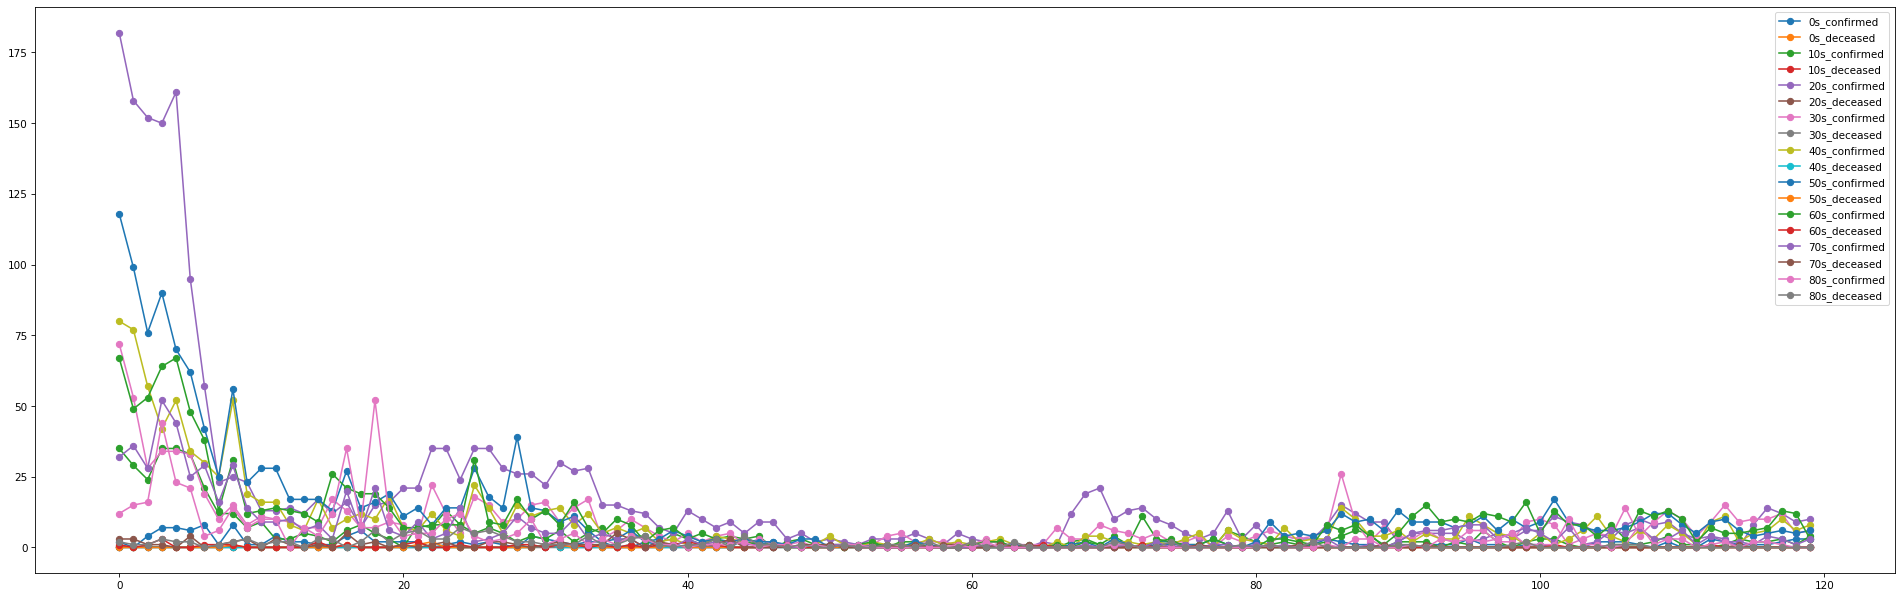

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_confirmed_vs_deceased(data):
    fig=plt.figure(figsize=(32, 10), dpi= 75, facecolor='w', edgecolor='k')

    for age_group in data:
        #if age_group == '50s':
        age_group_confirmed_ts_data = []
        age_group_deceased_ts_data = []
        for date in data[age_group]:
            #print(data[age_group][date])
            age_group_confirmed_ts_data.append(data[age_group][date][0])
            age_group_deceased_ts_data.append(data[age_group][date][1])
        plt.plot(age_group_confirmed_ts_data, '-o', label = age_group + '_confirmed')
        plt.plot(age_group_deceased_ts_data, '-o', label = age_group + '_deceased')

    #locs, labels = plt.xticks()            # Get locations and labels
    #plt.xticks(locs, labels, rotation='vertical') 
    #list(time_age_death_rate[age_group].keys()), 
    #plt.xticks(x, , rotation='vertical')
    plt.legend()
    plt.show()

plot_confirmed_vs_deceased(time_age_data)

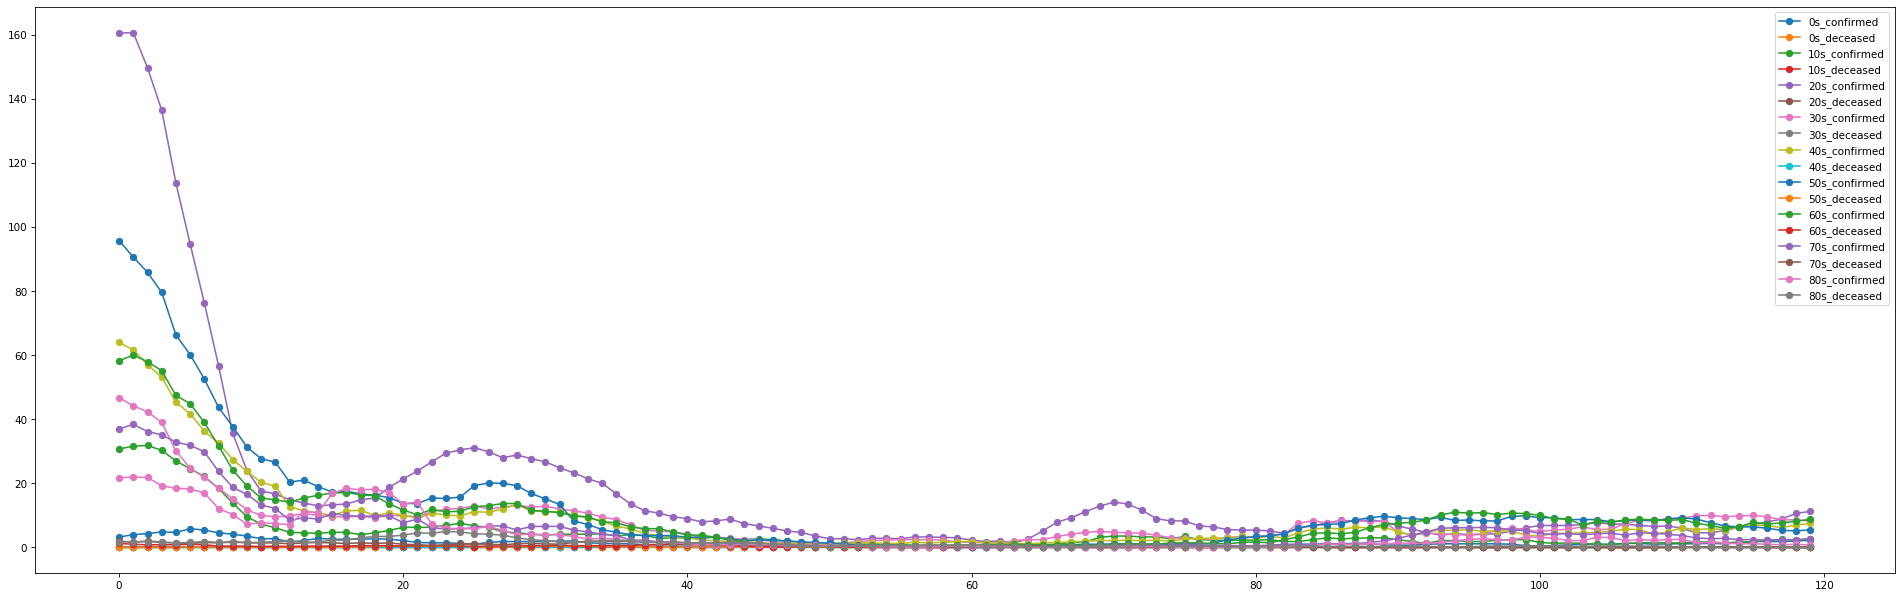

In [7]:
smooth_time_age_data = get_moving_average(time_age_data, 3)
plot_confirmed_vs_deceased(smooth_time_age_data)


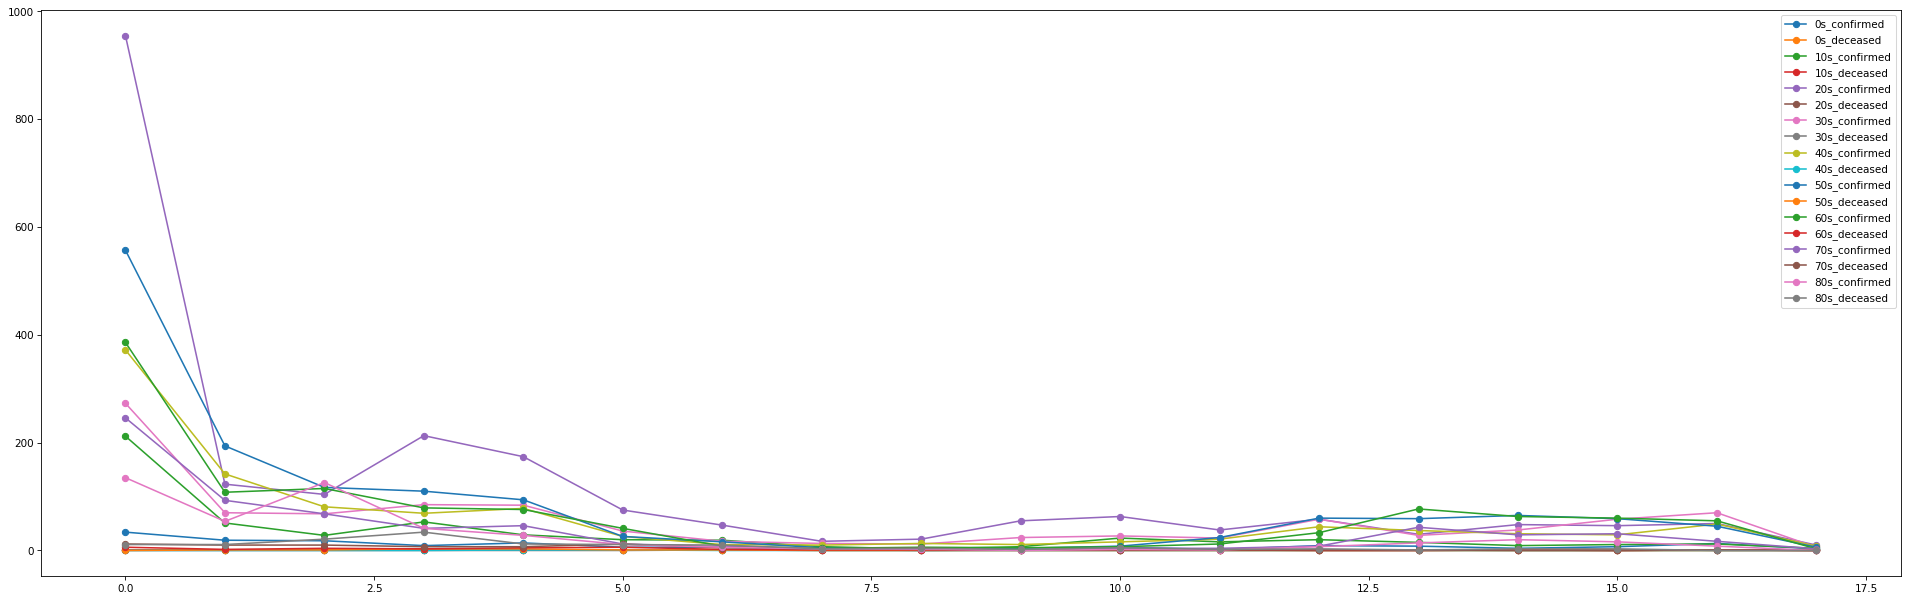

In [5]:

bined_time_age_data = get_bined_data(time_age_data,7)
plot_confirmed_vs_deceased(bined_time_age_data)


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def create_line_chart(data):
    fig=plt.figure(figsize=(32, 10), dpi= 75, facecolor='w', edgecolor='k')

    for age_group in data:
        #if age_group == '50s':
        age_group_ts_data = []
        for date in data[age_group]:
            age_group_ts_data.append(data[age_group][date])
        plt.plot(age_group_ts_data, '-o', label = age_group)

    locs, labels = plt.xticks()            # Get locations and labels
    plt.xticks(locs, labels, rotation='vertical') 
    #list(time_age_death_rate[age_group].keys()), 
    #plt.xticks(x, , rotation='vertical')
    plt.legend()
    plt.show()

time_age_death_rate = compute_death_rate(smooth_time_age_data, 0)
create_line_chart(time_age_death_rate)